In [2]:
!pip install scikit-plot
!pip install vecstack

In [3]:
#Import all necessary librabry

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import scikitplot as skplt

from vecstack import stacking
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score #works
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
#from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE 
from sklearn.svm import SVC
from collections import Counter #for Smote, 

import warnings
warnings.filterwarnings("ignore")

In [4]:
#Read training data file
trainfile = r'RevisedHomesiteTrain1.csv'
trainData = pd.read_csv(trainfile)

#Read test data file
testfile = r'RevisedHomesiteTest1.csv'
testData = pd.read_csv(testfile)

In [5]:
trainData.head(2)

,CoverageField11A,CoverageField11B,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,...,PropertyField38_N,PropertyField38_Y,GeographicField63_,GeographicField63_N,GeographicField63_Y,GeographicField64_CA,GeographicField64_IL,GeographicField64_NJ,GeographicField64_TX,QuoteConversion_Flag
0,2,1,17,23,17,23,15,22,16,22,...,1,0,0,1,0,1,0,0,0,0
1,5,9,6,8,6,8,5,7,5,8,...,1,0,0,1,0,0,0,1,0,0


In [6]:
testData.head(2)

,CoverageField11A,CoverageField11B,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,...,PropertyField38_N,PropertyField38_Y,GeographicField63_,GeographicField63_N,GeographicField63_Y,GeographicField64_CA,GeographicField64_IL,GeographicField64_NJ,GeographicField64_TX,GeographicField64
0,13,22,4,4,4,4,3,3,3,4,...,1,0,0,0,1,0,0,0,0,IL
1,4,5,8,14,8,14,7,12,8,13,...,1,0,0,1,0,0,0,0,0,NJ


Histogram plot 


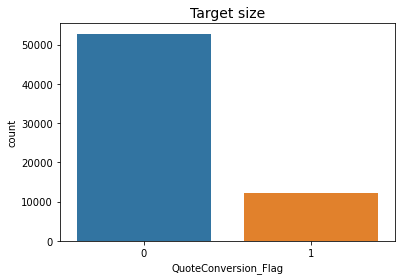

Dataset is imbalanced


In [7]:

import seaborn as sns
from matplotlib import pyplot as plt

print('Histogram plot ')
sns.countplot('QuoteConversion_Flag', data=trainData)
plt.title('Target size', fontsize=14)
plt.show()

print("Dataset is imbalanced")

In [8]:
print(trainData.shape)      # To get (Number of Rows, Number of Columns) of a data frame we use DataFrame.shape 
print(testData.shape)

(65000, 596)
(173836, 596)


In [9]:
pd.set_option('display.max_rows', 5)
# To check number of null values
trainData.isna().sum()

CoverageField11A        0
CoverageField11B        0
                       ..
GeographicField64_TX    0
QuoteConversion_Flag    0
Length: 596, dtype: int64

In [10]:
testData.isna().sum()

CoverageField11A        0
CoverageField11B        0
                       ..
GeographicField64_TX    0
GeographicField64       0
Length: 596, dtype: int64

In [11]:
pd.set_option('display.max_rows', 8)
pd.set_option('display.max_columns', 400)

# To check basic statistics of a data set, column wise
trainData.describe()

,CoverageField11A,CoverageField11B,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,CoverageField5A,CoverageField5B,CoverageField6A,CoverageField6B,Field10,Field11,Field7,Field8,Field9,GeographicField10A,GeographicField10B,GeographicField11A,GeographicField11B,GeographicField12A,GeographicField12B,GeographicField13A,GeographicField13B,GeographicField14A,GeographicField14B,GeographicField15A,GeographicField15B,GeographicField16A,GeographicField16B,GeographicField17A,GeographicField17B,GeographicField18A,GeographicField18B,GeographicField19A,GeographicField19B,GeographicField1A,GeographicField1B,GeographicField20A,GeographicField20B,GeographicField21A,GeographicField21B,GeographicField22A,GeographicField22B,GeographicField23A,GeographicField23B,GeographicField24A,GeographicField24B,GeographicField25A,GeographicField25B,GeographicField26A,GeographicField26B,GeographicField27A,GeographicField27B,GeographicField28A,GeographicField28B,GeographicField29A,GeographicField29B,GeographicField2A,GeographicField2B,GeographicField30A,GeographicField30B,GeographicField31A,GeographicField31B,GeographicField32A,GeographicField32B,GeographicField33A,GeographicField33B,GeographicField34A,GeographicField34B,GeographicField35A,GeographicField35B,GeographicField36A,GeographicField36B,GeographicField37A,GeographicField37B,GeographicField38A,GeographicField38B,GeographicField39A,GeographicField39B,GeographicField3A,GeographicField3B,GeographicField40A,GeographicField40B,GeographicField41A,GeographicField41B,GeographicField42A,GeographicField42B,GeographicField43A,GeographicField43B,GeographicField44A,GeographicField44B,GeographicField45A,GeographicField45B,GeographicField46A,GeographicField46B,GeographicField47A,GeographicField47B,GeographicField48A,GeographicField48B,GeographicField49A,GeographicField49B,GeographicField4A,GeographicField4B,GeographicField50A,GeographicField50B,GeographicField51A,GeographicField51B,GeographicField52A,GeographicField52B,GeographicField53A,GeographicField53B,GeographicField54A,GeographicField54B,GeographicField55A,GeographicField55B,GeographicField56A,GeographicField56B,GeographicField57A,GeographicField57B,GeographicField58A,GeographicField58B,GeographicField59A,GeographicField59B,GeographicField5A,GeographicField5B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField6A,GeographicField6B,GeographicField7A,GeographicField7B,GeographicField8A,GeographicField8B,GeographicField9A,GeographicField9B,PersonalField1,PersonalField10A,PersonalField10B,PersonalField11,PersonalField12,PersonalField13,PersonalField14,PersonalField15,PersonalField2,PersonalField22,PersonalField23,PersonalField24,PersonalField25,PersonalField26,PersonalField27,PersonalField28,PersonalField29,PersonalField30,PersonalField31,PersonalField32,PersonalField33,PersonalField34,PersonalField35,PersonalField36,PersonalField37,PersonalField38,PersonalField39,PersonalField40,PersonalField41,PersonalField42,PersonalField43,PersonalField44,PersonalField45,PersonalField46,PersonalField47,PersonalField48,PersonalField49,PersonalField4A,PersonalField4B,PersonalField5,PersonalField50,PersonalField51,PersonalField52,PersonalField53,PersonalField54,PersonalField55,PersonalField56,PersonalField57,PersonalField58,PersonalField59,PersonalField6,PersonalField60,PersonalField61,PersonalField62,PersonalField63,PersonalField64,PersonalField65,...,PersonalField17_YY,PersonalField17_YZ,PersonalField17_ZA,PersonalField17_ZB,PersonalField17_ZC,PersonalField17_ZD,PersonalField17_ZE,PersonalField17_ZF,PersonalField17_ZG,PersonalField17_ZH,PersonalField17_ZI,PersonalField17_ZJ,PersonalField17_ZK,PersonalField17_ZL,PersonalField17_ZM,PersonalField17_ZN,PersonalField17_ZO,PersonalField17_ZP,PersonalField17_ZQ,PersonalField17_ZS,PersonalField17_ZT,PersonalField17_ZU,PersonalField17_ZV,PersonalField17_ZW,PersonalField18_XB,PersonalF

In [12]:
#To get list of names of all Columns from a dataframe

TrainCols = list(trainData.columns.values)
TestCols = list(testData.columns.values)
print(TrainCols)
print(TestCols)

['CoverageField11A', 'CoverageField11B', 'CoverageField1A', 'CoverageField1B', 'CoverageField2A', 'CoverageField2B', 'CoverageField3A', 'CoverageField3B', 'CoverageField4A', 'CoverageField4B', 'CoverageField5A', 'CoverageField5B', 'CoverageField6A', 'CoverageField6B', 'Field10', 'Field11', 'Field7', 'Field8', 'Field9', 'GeographicField10A', 'GeographicField10B', 'GeographicField11A', 'GeographicField11B', 'GeographicField12A', 'GeographicField12B', 'GeographicField13A', 'GeographicField13B', 'GeographicField14A', 'GeographicField14B', 'GeographicField15A', 'GeographicField15B', 'GeographicField16A', 'GeographicField16B', 'GeographicField17A', 'GeographicField17B', 'GeographicField18A', 'GeographicField18B', 'GeographicField19A', 'GeographicField19B', 'GeographicField1A', 'GeographicField1B', 'GeographicField20A', 'GeographicField20B', 'GeographicField21A', 'GeographicField21B', 'GeographicField22A', 'GeographicField22B', 'GeographicField23A', 'GeographicField23B', 'GeographicField24A',

In [13]:
# Seperate Target column from Train Data
X_train = trainData[TrainCols[0:len(TrainCols) - 1]].copy()
X_train.drop('QuoteNumber', axis=1, inplace=True)
Y_train = trainData[['QuoteConversion_Flag']].copy()
print(X_train.shape)
print(Y_train.shape)
print(Y_train.value_counts())

print("===========")

X_test = testData[TestCols[0:len(TestCols)-1]].copy()
quoteNumber=X_test[['QuoteNumber']]
print(quoteNumber.shape)
X_test.drop('QuoteNumber',axis=1,inplace=True)
print(X_test.shape)

(65000, 594)
(65000, 1)
QuoteConversion_Flag
0                       52738
1                       12262
dtype: int64
(173836, 1)
(173836, 594)


In [19]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
clf_predict=clf.predict(X_test)
Y_Pred = pd.DataFrame(clf_predict,
  columns=['QuoteConversion_Flag'])
result = pd.concat(
  [quoteNumber['QuoteNumber'],Y_Pred],axis=1)

result.to_csv("DTC_BaseModel.csv",index=False)

In [21]:
parameters={'min_samples_split' : range(10,100,10),'max_depth': range(1,20,2)}
clf_random = RandomizedSearchCV(clf,parameters,n_iter=15,verbose=10)
clf_random.fit(X_train, Y_train)
grid_parm=clf_random.best_params_
print(grid_parm)

clf = DecisionTreeClassifier(**grid_parm)
clf.fit(X_train, Y_train)
clf_predict = clf.predict(X_test)

Y_Pred = pd.DataFrame(clf_predict,columns=['QuoteConversion_Flag'])
result = pd.concat([quoteNumber['QuoteNumber'],Y_Pred],axis=1)

result.to_csv("DTC_HyperParameterTuning.csv",index=False)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START max_depth=15, min_samples_split=90.........................
[CV 1/5; 1/15] END max_depth=15, min_samples_split=90;, score=0.911 total time=   7.8s
[CV 2/5; 1/15] START max_depth=15, min_samples_split=90.........................
[CV 2/5; 1/15] END max_depth=15, min_samples_split=90;, score=0.915 total time=   7.5s
[CV 3/5; 1/15] START max_depth=15, min_samples_split=90.........................
[CV 3/5; 1/15] END max_depth=15, min_samples_split=90;, score=0.909 total time=   7.1s
[CV 4/5; 1/15] START max_depth=15, min_samples_split=90.........................
[CV 4/5; 1/15] END max_depth=15, min_samples_split=90;, score=0.905 total time=   8.1s
[CV 5/5; 1/15] START max_depth=15, min_samples_split=90.........................
[CV 5/5; 1/15] END max_depth=15, min_samples_split=90;, score=0.908 total time=   7.8s
[CV 1/5; 2/15] START max_depth=15, min_samples_split=60.........................
[CV 1/5; 2/15] END

[CV 4/5; 10/15] END max_depth=13, min_samples_split=10;, score=0.906 total time=   7.2s
[CV 5/5; 10/15] START max_depth=13, min_samples_split=10........................
[CV 5/5; 10/15] END max_depth=13, min_samples_split=10;, score=0.909 total time=   6.9s
[CV 1/5; 11/15] START max_depth=3, min_samples_split=40.........................
[CV 1/5; 11/15] END max_depth=3, min_samples_split=40;, score=0.877 total time=   1.7s
[CV 2/5; 11/15] START max_depth=3, min_samples_split=40.........................
[CV 2/5; 11/15] END max_depth=3, min_samples_split=40;, score=0.879 total time=   1.7s
[CV 3/5; 11/15] START max_depth=3, min_samples_split=40.........................
[CV 3/5; 11/15] END max_depth=3, min_samples_split=40;, score=0.878 total time=   1.7s
[CV 4/5; 11/15] START max_depth=3, min_samples_split=40.........................
[CV 4/5; 11/15] END max_depth=3, min_samples_split=40;, score=0.876 total time=   1.6s
[CV 5/5; 11/15] START max_depth=3, min_samples_split=40................

In [ ]:
rfc = RandomForestClassifier(verbose=10)
rfc.fit(X_train, Y_train)
rfc_predict=rfc.predict(X_test)

Y_Pred = pd.DataFrame(rfc_predict,
  columns=['QuoteConversion_Flag'])
result = pd.concat(
  [quoteNumber['QuoteNumber'],Y_Pred],axis=1)

result.to_csv("RF_BaseModel.csv",index=False)

In [25]:
rfc = RandomForestClassifier()
rfc_random = RandomizedSearchCV(rfc,parameters,n_iter=15,verbose=10)
rfc_random.fit(X_train, Y_train)
grid_parm_rfc=rfc_random.best_params_
print(grid_parm_rfc)

rfc= RandomForestClassifier(**grid_parm_rfc)
rfc.fit(X_train, Y_train)
rfc_predict = rfc.predict(X_test)

Y_Pred = pd.DataFrame(rfc_predict,columns=['QuoteConversion_Flag'])
result = pd.concat([quoteNumber['QuoteNumber'],Y_Pred],axis=1)

result.to_csv("RF_HyperParameterTuning.csv",index=False)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START max_depth=15, min_samples_split=70.........................
[CV 1/5; 1/15] END max_depth=15, min_samples_split=70;, score=0.904 total time=  20.4s
[CV 2/5; 1/15] START max_depth=15, min_samples_split=70.........................
[CV 2/5; 1/15] END max_depth=15, min_samples_split=70;, score=0.901 total time=  21.5s
[CV 3/5; 1/15] START max_depth=15, min_samples_split=70.........................
[CV 3/5; 1/15] END max_depth=15, min_samples_split=70;, score=0.905 total time=  23.1s
[CV 4/5; 1/15] START max_depth=15, min_samples_split=70.........................
[CV 4/5; 1/15] END max_depth=15, min_samples_split=70;, score=0.902 total time=  21.2s
[CV 5/5; 1/15] START max_depth=15, min_samples_split=70.........................
[CV 5/5; 1/15] END max_depth=15, min_samples_split=70;, score=0.901 total time=  21.7s
[CV 1/5; 2/15] START max_depth=17, min_samples_split=70.........................
[CV 1/5; 2/15] END

[CV 4/5; 10/15] END max_depth=7, min_samples_split=80;, score=0.859 total time=  11.1s
[CV 5/5; 10/15] START max_depth=7, min_samples_split=80.........................
[CV 5/5; 10/15] END max_depth=7, min_samples_split=80;, score=0.862 total time=  11.6s
[CV 1/5; 11/15] START max_depth=9, min_samples_split=70.........................
[CV 1/5; 11/15] END max_depth=9, min_samples_split=70;, score=0.881 total time=  15.2s
[CV 2/5; 11/15] START max_depth=9, min_samples_split=70.........................
[CV 2/5; 11/15] END max_depth=9, min_samples_split=70;, score=0.883 total time=  14.7s
[CV 3/5; 11/15] START max_depth=9, min_samples_split=70.........................
[CV 3/5; 11/15] END max_depth=9, min_samples_split=70;, score=0.887 total time=  14.2s
[CV 4/5; 11/15] START max_depth=9, min_samples_split=70.........................
[CV 4/5; 11/15] END max_depth=9, min_samples_split=70;, score=0.879 total time=  14.9s
[CV 5/5; 11/15] START max_depth=9, min_samples_split=70..................

In [27]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=100)
mlp.fit(X_train, Y_train)
mlp_predict=mlp.predict(X_test)

Y_Pred = pd.DataFrame(mlp_predict,columns=['QuoteConversion_Flag'])
result = pd.concat([quoteNumber['QuoteNumber'],Y_Pred],axis=1)

result.to_csv("MLPClassifier_BaseModel.csv",index=False)

In [ ]:
from sklearn.neural_network import MLPClassifier

parameters = {'hidden_layer_sizes':[(10,5,3), (20,7,3)], 'activation':['tanh', 'relu'],
              'learning_rate':['constant', 'adaptive'], 'max_iter' :[100, 150]}
mlp = MLPClassifier(max_iter=100)
mlp_random = RandomizedSearchCV(mlp,parameters,n_iter=15,verbose=10)
mlp_random.fit(X_train, Y_train)
grid_parm=mlp_random.best_params_
print(grid_parm)

#Using the parameters obtained from HyperParameterTuning in the MLPClassifier 
mlp = MLPClassifier(**grid_parm)
mlp.fit(X_train, Y_train)
mlp_predict = mlp.predict(X_test)

Y_Pred = pd.DataFrame(mlp_predict,columns=['QuoteConversion_Flag'])
result = pd.concat([quoteNumber['QuoteNumber'],Y_Pred],axis=1)

result.to_csv("MLPClassifier_HyperParameterTuning.csv",index=False)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START activation=tanh, hidden_layer_sizes=(10, 5, 3), learning_rate=constant, max_iter=150
[CV 1/5; 1/15] END activation=tanh, hidden_layer_sizes=(10, 5, 3), learning_rate=constant, max_iter=150;, score=0.811 total time=  25.5s
[CV 2/5; 1/15] START activation=tanh, hidden_layer_sizes=(10, 5, 3), learning_rate=constant, max_iter=150
[CV 2/5; 1/15] END activation=tanh, hidden_layer_sizes=(10, 5, 3), learning_rate=constant, max_iter=150;, score=0.811 total time=  28.0s
[CV 3/5; 1/15] START activation=tanh, hidden_layer_sizes=(10, 5, 3), learning_rate=constant, max_iter=150
[CV 3/5; 1/15] END activation=tanh, hidden_layer_sizes=(10, 5, 3), learning_rate=constant, max_iter=150;, score=0.811 total time=  25.6s
[CV 4/5; 1/15] START activation=tanh, hidden_layer_sizes=(10, 5, 3), learning_rate=constant, max_iter=150
[CV 4/5; 1/15] END activation=tanh, hidden_layer_sizes=(10, 5, 3), learning_rate=constant, max_iter=150;

[CV 5/5; 7/15] END activation=relu, hidden_layer_sizes=(20, 7, 3), learning_rate=adaptive, max_iter=150;, score=0.850 total time=  55.0s
[CV 1/5; 8/15] START activation=tanh, hidden_layer_sizes=(10, 5, 3), learning_rate=constant, max_iter=100
[CV 1/5; 8/15] END activation=tanh, hidden_layer_sizes=(10, 5, 3), learning_rate=constant, max_iter=100;, score=0.811 total time=  33.2s
[CV 2/5; 8/15] START activation=tanh, hidden_layer_sizes=(10, 5, 3), learning_rate=constant, max_iter=100
[CV 2/5; 8/15] END activation=tanh, hidden_layer_sizes=(10, 5, 3), learning_rate=constant, max_iter=100;, score=0.811 total time=  17.0s
[CV 3/5; 8/15] START activation=tanh, hidden_layer_sizes=(10, 5, 3), learning_rate=constant, max_iter=100
[CV 3/5; 8/15] END activation=tanh, hidden_layer_sizes=(10, 5, 3), learning_rate=constant, max_iter=100;, score=0.811 total time=  39.3s
[CV 4/5; 8/15] START activation=tanh, hidden_layer_sizes=(10, 5, 3), learning_rate=constant, max_iter=100
[CV 4/5; 8/15] END activatio

[CV 4/5; 14/15] END activation=tanh, hidden_layer_sizes=(20, 7, 3), learning_rate=adaptive, max_iter=150;, score=0.811 total time=  42.9s
[CV 5/5; 14/15] START activation=tanh, hidden_layer_sizes=(20, 7, 3), learning_rate=adaptive, max_iter=150
[CV 5/5; 14/15] END activation=tanh, hidden_layer_sizes=(20, 7, 3), learning_rate=adaptive, max_iter=150;, score=0.811 total time=  21.0s
[CV 1/5; 15/15] START activation=relu, hidden_layer_sizes=(10, 5, 3), learning_rate=constant, max_iter=150
[CV 1/5; 15/15] END activation=relu, hidden_layer_sizes=(10, 5, 3), learning_rate=constant, max_iter=150;, score=0.811 total time=  42.4s
[CV 2/5; 15/15] START activation=relu, hidden_layer_sizes=(10, 5, 3), learning_rate=constant, max_iter=150
[CV 2/5; 15/15] END activation=relu, hidden_layer_sizes=(10, 5, 3), learning_rate=constant, max_iter=150;, score=0.889 total time= 2.0min
[CV 3/5; 15/15] START activation=relu, hidden_layer_sizes=(10, 5, 3), learning_rate=constant, max_iter=150
[CV 3/5; 15/15] END 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X_train, Y_train)
neigh_predict=neigh.predict(X_test)

Y_Pred = pd.DataFrame(neigh_predict,columns=['QuoteConversion_Flag'])
result = pd.concat([quoteNumber['QuoteNumber'],Y_Pred],axis=1)

result.to_csv("KNN_BaseModel.csv",index=False)

In [ ]:
from sklearn.svm import LinearSVC 
linsvm = LinearSVC(max_iter=300) 
linsvm.fit(X_train, Y_train)
linsvm_predict=linsvm.predict(X_test)

Y_Pred = pd.DataFrame(linsvm_predict,columns=['QuoteConversion_Flag'])
result = pd.concat([quoteNumber['QuoteNumber'],Y_Pred],axis=1)

result.to_csv("LSVM_BaseModel.csv",index=False)

In [23]:
model = GradientBoostingClassifier()
    
model = model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

Y_Pred = pd.DataFrame(y_pred,columns=['QuoteConversion_Flag'])
result = pd.concat([quoteNumber['QuoteNumber'],Y_Pred],axis=1)

result.to_csv("GBC_BaseModel.csv",index=False)

In [24]:
search_grid={'n_estimators':[50,100,150,200],'learning_rate':[0.01,0.1]}
abc =GradientBoostingClassifier()

abc_random = RandomizedSearchCV(abc,search_grid,n_iter=15,verbose=10)
abc_random.fit(X_train, Y_train)
grid_parm_abc=abc_random.best_params_
print(grid_parm_abc)
abc= GradientBoostingClassifier(**grid_parm_abc)
abc.fit(X_train, Y_train)
abc_predict = abc.predict(X_test)

Y_Pred = pd.DataFrame(abc_predict,columns=['QuoteConversion_Flag'])
result = pd.concat([quoteNumber['QuoteNumber'],Y_Pred],axis=1)

result.to_csv("GBC_HyperParameterTuning.csv",index=False)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START learning_rate=0.01, n_estimators=50.........................
[CV 1/5; 1/8] END learning_rate=0.01, n_estimators=50;, score=0.819 total time= 1.2min
[CV 2/5; 1/8] START learning_rate=0.01, n_estimators=50.........................
[CV 2/5; 1/8] END learning_rate=0.01, n_estimators=50;, score=0.820 total time= 1.1min
[CV 3/5; 1/8] START learning_rate=0.01, n_estimators=50.........................
[CV 3/5; 1/8] END learning_rate=0.01, n_estimators=50;, score=0.820 total time= 1.1min
[CV 4/5; 1/8] START learning_rate=0.01, n_estimators=50.........................
[CV 4/5; 1/8] END learning_rate=0.01, n_estimators=50;, score=0.821 total time= 1.1min
[CV 5/5; 1/8] START learning_rate=0.01, n_estimators=50.........................
[CV 5/5; 1/8] END learning_rate=0.01, n_estimators=50;, score=0.820 total time= 1.1min
[CV 1/5; 2/8] START learning_rate=0.01, n_estimators=100........................
[CV 1/5; 2/8] END l

KeyboardInterrupt: 

In [ ]:
print("___________________________________________________________________\nSMOTE\n")
print('Original dataset shape %s' % Counter(Y_train))
sm = SMOTE(sampling_strategy=0.5)
X_res, y_res = sm.fit_resample(X_train, Y_train)
print('Resampled dataset shape %s' % Counter(y_res))

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_res,y_res)
clf_predict=clf.predict(X_test)
Y_Pred = pd.DataFrame(clf_predict,columns=['QuoteConversion_Flag'])
result = pd.concat([quoteNumber['QuoteNumber'],Y_Pred],axis=1)

result.to_csv("DTC_smote.csv",index=False)

In [ ]:
rfc = RandomForestClassifier(verbose=10)
rfc.fit(X_res, y_res)
rfc_predict=rfc.predict(X_test)

Y_Pred = pd.DataFrame(rfc_predict,columns=['QuoteConversion_Flag'])
result = pd.concat([quoteNumber['QuoteNumber'],Y_Pred],axis=1)

result.to_csv("RF_smote.csv",index=False)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=100)
mlp.fit(X_res, y_res)
mlp_predict=mlp.predict(X_test)

Y_Pred = pd.DataFrame(mlp_predict,columns=['QuoteConversion_Flag'])
result = pd.concat([quoteNumber['QuoteNumber'],Y_Pred],axis=1)

result.to_csv("MLP_smote.csv",index=False)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X_res, y_res)
neigh_predict=neigh.predict(X_test)

Y_Pred = pd.DataFrame(neigh_predict,columns=['QuoteConversion_Flag'])
result = pd.concat([quoteNumber['QuoteNumber'],Y_Pred],axis=1)

result.to_csv("KNN_smote.csv",index=False)

In [ ]:
from sklearn.svm import LinearSVC 
linsvm = LinearSVC(max_iter=300) 
linsvm.fit(X_res, y_res) 
linsvm_predict=linsvm.predict(X_test)

Y_Pred = pd.DataFrame(linsvm_predict,columns=['QuoteConversion_Flag'])
result = pd.concat([quoteNumber['QuoteNumber'],Y_Pred],axis=1)

result.to_csv("LSVM_smote.csv",index=False)

In [ ]:

models = [KNeighborsClassifier(), MLPClassifier(), LinearSVC(), RandomForestClassifier(), DecisionTreeClassifier()]
      
S_Train, S_Test = stacking(models, X_res, y_res, X_test,
                           regression=False, mode='oof_pred_bag', needs_proba=False, save_dir=None, 
                           metric=accuracy_score, n_folds=4, stratified=True, shuffle=True,  
                           random_state=0, verbose=2)

In [ ]:
X_train.shape

In [ ]:
S_Train.shape

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(S_Train, y_res)
clf_predict=clf.predict(S_Test)
Y_Pred = pd.DataFrame(clf_predict,columns=['QuoteConversion_Flag'])
result = pd.concat([quoteNumber['QuoteNumber'],Y_Pred],axis=1)

result.to_csv("DTC_smote_stack.csv",index=False)

In [ ]:
rfc = RandomForestClassifier(verbose=10)
rfc.fit(S_Train, y_res)
rfc_predict=rfc.predict(S_Test)

Y_Pred = pd.DataFrame(rfc_predict,columns=['QuoteConversion_Flag'])
result = pd.concat([quoteNumber['QuoteNumber'],Y_Pred],axis=1)

result.to_csv("RF_smote_stack.csv",index=False)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=100)
mlp.fit(S_Train, y_res)
mlp_predict=mlp.predict(S_Test)

Y_Pred = pd.DataFrame(mlp_predict,columns=['QuoteConversion_Flag'])
result = pd.concat([quoteNumber['QuoteNumber'],Y_Pred],axis=1)

result.to_csv("MLP_smote_stack.csv",index=False)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(S_Train, y_res)
neigh_predict=neigh.predict(S_Test)

Y_Pred = pd.DataFrame(neigh_predict,columns=['QuoteConversion_Flag'])
result = pd.concat([quoteNumber['QuoteNumber'],Y_Pred],axis=1)

result.to_csv("KNN_smote_stack.csv",index=False)

In [ ]:
from sklearn.svm import LinearSVC 
linsvm = LinearSVC(max_iter=300) 
linsvm.fit(S_Train, y_res) 
linsvm_predict=linsvm.predict(S_Test)

Y_Pred = pd.DataFrame(linsvm_predict,columns=['QuoteConversion_Flag'])
result = pd.concat([quoteNumber['QuoteNumber'],Y_Pred],axis=1)

result.to_csv("LSVM_smote_stack.csv",index=False)

In [ ]:
model = GradientBoostingClassifier()
    
model = model.fit(S_Train, y_res)
y_pred = model.predict(S_Test)

Y_Pred = pd.DataFrame(y_pred,columns=['QuoteConversion_Flag'])
result = pd.concat([quoteNumber['QuoteNumber'],Y_Pred],axis=1)

result.to_csv("GBC_smote_stack.csv",index=False)

In [ ]:

models = [GradientBoostingClassifier(), MLPClassifier(), RandomForestClassifier(), DecisionTreeClassifier()]
      
S_Train, S_Test = stacking(models,                   
                           X_res, y_res, X_test,
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=4, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

In [ ]:
from sklearn.svm import LinearSVC 
linsvm = LinearSVC(max_iter=300) 
linsvm.fit(S_Train, y_res) 
linsvm_predict=linsvm.predict(S_Test)

Y_Pred = pd.DataFrame(linsvm_predict,columns=['QuoteConversion_Flag'])
result = pd.concat([quoteNumber['QuoteNumber'],Y_Pred],axis=1)

result.to_csv("LSVM_smote_stack2.csv",index=False)

In [ ]:
parameters={'min_samples_split' : range(10,100,10),'max_depth': range(1,20,2)}
rfc = RandomForestClassifier(verbose=10)
rfc_random = RandomizedSearchCV(rfc,parameters,n_iter=15)
rfc_random.fit(S_Train, y_res)
grid_parm_rfc=rfc_random.best_params_
print(grid_parm_rfc)

#Construct Random Forest with best parameters
rfc= RandomForestClassifier(**grid_parm_rfc)
rfc.fit(S_Train, y_res)
rfc_predict = rfc.predict(S_Test)

Y_Pred = pd.DataFrame(rfc_predict,columns=['QuoteConversion_Flag'])
result = pd.concat([quoteNumber['QuoteNumber'],Y_Pred],axis=1)

result.to_csv("RF_smote_stack2.csv",index=False)